In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.fft as fft

from matplotlib.patches import Wedge
from mpl_toolkits.axes_grid1 import ImageGrid

plt.rcParams.update({'font.size' : 9})
plt.rc('text', usetex=True)
plt.rc('text.latex',
       preamble = r'\usepackage[Symbolsmallscale]{upgreek} '
                + r'\usepackage{mathtools} '
                + r'\usepackage{isomath} '
                + r'\usepackage{physics}')

# Figure 1

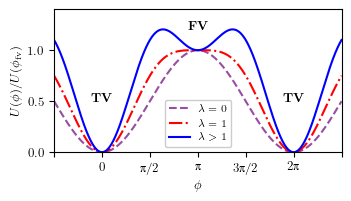

In [2]:
fig = plt.figure()
fig.set_size_inches(3.709, 0.5*3.709)
phis = np.linspace(-0.5*np.pi, 2.5*np.pi, 2000)
plt.plot(phis/np.pi, 0.5*(1. - np.cos(phis)),
         '--', color='#984ea3', label=r'$\lambda=0$')
plt.plot(phis/np.pi, 0.5*(1. - np.cos(phis) + 0.5*np.sin(phis)**2.),
         'r-.', label=r'$\lambda=1$')
plt.plot(phis/np.pi, 0.5*(1. - np.cos(phis) + 1.2*np.sin(phis)**2.),
         'b', label=r'$\lambda>1$')
plt.text(1., 1.2, r'$\textrm{\textbf{FV}}$', ha='center')
plt.text(2., 0.5, r'$\textrm{\textbf{TV}}$', ha='center')
plt.text(0., 0.5, r'$\textrm{\textbf{TV}}$', ha='center')
plt.xlim(phis[0]/np.pi, phis[-1]/np.pi)
plt.ylim(0., 1.4)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$U(\phi)/U(\phi_\mathrm{fv})$')
plt.xticks([-0.5, 0., 0.5, 1., 1.5, 2., 2.5],
           ['', r'$0$', r'$\uppi/2$', r'$\uppi$', r'$3\uppi/2$', r'$2\uppi$', ''])
plt.legend(loc=8, fontsize='small', framealpha=1.)

# Figure 2

Text(140.07000000000002, 620.31, '$\\xi$')

<Figure size 640x480 with 0 Axes>

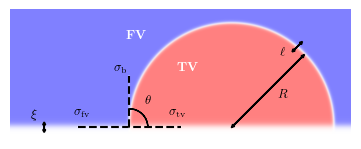

In [3]:
fig = plt.figure()
fig, ax = plt.subplots()
plt.axis('off')
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
plt.axis('off')
aspect = 0.38
fig.set_size_inches(3.41, aspect * 3.41, forward=True)
nx = 2001
ny = int(aspect * nx)
x = np.outer(np.ones(ny), np.linspace(0., 1., nx))
y = np.outer(np.linspace(0., aspect, ny), np.ones(nx))
rad, thick = 0.3, 0.005
yw = 0.04
xb, yb = 0.65, yw
rb = np.sqrt((x-xb)**2. + (y-yb)**2.)
bwr = mpl.colormaps['bwr']
im = bwr(0.5 * (np.tanh((rad-rb)/thick) + 1.))
im[:, :, -1] = 0.5
im[:, :, -1] *= 0.5 * (np.tanh(0.5*(y-yw)/thick) + 1.)
im = im[::-1]
plt.imshow(im, interpolation='bicubic', interpolation_stage='auto')
c = plt.contourf(0.5 * (np.tanh(0.5*(-aspect+yw+y-2.*thick)/thick) + 1.), 1,
                 hatches=['', 'xxx'], alpha=0)
c.set_edgecolor((0.94, 0.94, 0.94, 1))
l = 0.15
plt.plot([(0.65-rad-l)*nx, (0.65-rad+l)*nx],
         [(aspect-yw+thick)*nx, (aspect-yw+thick)*nx], 'w', alpha=0.25)
plt.plot([(0.65-rad-l)*nx, (0.65-rad+l)*nx],
         [(aspect-yw+thick)*nx, (aspect-yw+thick)*nx], 'k--')
plt.plot([(0.65-rad)*nx, (0.65-rad)*nx],
         [(aspect-yw+thick)*nx, (aspect-yw+thick-l)*nx], 'w', alpha=0.25)
plt.plot([(0.65-rad)*nx, (0.65-rad)*nx],
         [(aspect-yw+thick)*nx, (aspect-yw+thick-l)*nx], 'k--')
w = Wedge(((0.65-rad)*nx, (aspect-yw+thick)*nx), 0.36*l*nx, -90., 0.,
          fc='none', edgecolor='k', width=0.)
ax.add_patch(w)
plt.text(0.37*nx, 0.2*ny, r'$\textrm{\textbf{FV}}$', color='w',
         ha='center', va='center', fontsize='medium')
plt.text(0.52*nx, 0.45*ny, r'$\textrm{\textbf{TV}}$', color='w',
         ha='center', va='center', fontsize='medium')
plt.text(0.405*nx, 0.7*ny, r'$\theta$', color='k',
         ha='center', va='center', fontsize='medium')
plt.text(0.21*nx, 0.79*ny, r'$\sigma_\mathrm{fv}$', color='k',
         ha='center', va='center', fontsize='medium')
plt.text(0.49*nx, 0.79*ny, r'$\sigma_\mathrm{tv}$', color='k',
         ha='center', va='center', fontsize='medium')
plt.text(0.325*nx, 0.45*ny, r'$\sigma_\mathrm{b}$', color='k',
         ha='center', va='center', fontsize='medium')
plt.arrow(0.65*nx, (aspect-yw+thick)*nx,
          np.sqrt(0.5)*rad*nx, -np.sqrt(0.5)*rad*nx,
          color='k', length_includes_head=True,
          lw=1.2, head_width=16., head_length=16.)
plt.arrow((0.65+np.sqrt(0.5)*rad)*nx, (aspect-yw+thick-np.sqrt(0.5)*rad)*nx,
          -np.sqrt(0.5)*rad*nx, np.sqrt(0.5)*rad*nx,
          color='k', length_includes_head=True,
          lw=1.2, head_width=16., head_length=16.)
plt.text(0.8*nx, 0.25*nx, r'$R$', color='k',
         ha='center', va='center', fontsize='medium')
plt.arrow((0.63+np.sqrt(0.5)*rad)*nx, (aspect-yw-0.024+thick-np.sqrt(0.5)*rad)*nx,
          0.015*nx, -0.015*nx,
          color='k', length_includes_head=True,
          lw=1.2, head_width=16., head_length=16.)
plt.arrow((0.63+np.sqrt(0.5)*rad)*nx, (aspect-yw-0.024+thick-np.sqrt(0.5)*rad)*nx,
          -0.015*nx, 0.015*nx,
          color='k', length_includes_head=True,
          lw=1.2, head_width=16., head_length=16.)
plt.text(0.8*nx, 0.125*nx, r'$\ell$', color='k',
         ha='center', va='center', fontsize='medium')
plt.arrow(0.1*nx, (aspect-yw+thick)*nx, 0., 0.015*nx,
          color='k', length_includes_head=True,
          lw=1.2, head_width=16., head_length=16.)
plt.arrow(0.1*nx, (aspect-yw+thick)*nx, 0., -0.015*nx,
          color='k', length_includes_head=True,
          lw=1.2, head_width=16., head_length=16.)
plt.text(0.07*nx, 0.31*nx, r'$\xi$', color='k',
         ha='center', va='center', fontsize='medium')

# Figure 3

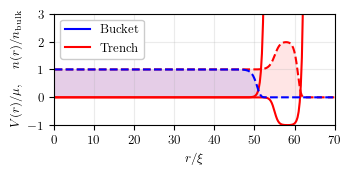

In [4]:
fig = plt.figure()
fig.set_size_inches(3.62, 0.4 * 3.62, forward=True)
plt.grid(alpha=0.25)
data = np.genfromtxt('data/fig3/density-profiles.txt')
r = data[:, 0]
plt.plot(r, 0.5 * 841. * (1. + np.tanh(r-55.-9.75))
            + 0.5 * (np.tanh(r-55.-9.75) - np.tanh(r-55.)), 'r')
plt.plot(r, 0.5 * 841. * (1. + np.tanh(r-55.)), 'r')
nTrench = data[:, 1]
nBucket = data[:, 2]
plt.fill_between(r, 0., nTrench, color='r', alpha=0.1, ec=None)
plt.fill_between(r, 0., nBucket, color='b', alpha=0.1, ec=None)
plt.plot(r, nTrench, 'r--')
plt.plot(r, nBucket, 'b--')
plt.plot(-10., -10., 'b', label=r'$\mathrm{Bucket}$')
plt.plot(-10., -10., 'r', label=r'$\mathrm{Trench}$')
plt.xlim(0., 70.)
plt.ylim(-1., 3.)
plt.xlabel(r'$r/\xi$')
plt.ylabel(r'$V(r)/\mu,\quad n(r)/n_\mathrm{bulk}$')
plt.legend(loc=2, framealpha=1.)

# Figure 4

Text(0.767, 0.81, '$\\textrm{Time evolution}\\:\\longrightarrow$')

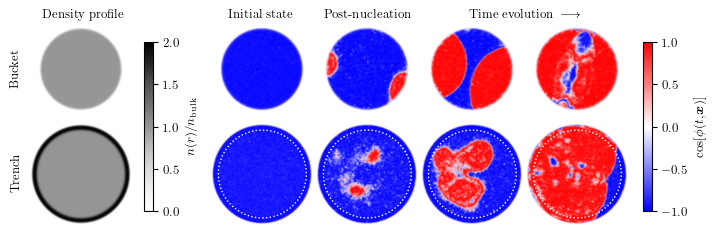

In [5]:
fig = plt.figure()
fig.set_size_inches(2.27*3.39, 3.39, forward=True)
axs = ImageGrid(fig, 111, nrows_ncols=(2,5), axes_pad=0.05, share_all=False)
bucket = np.load('data/fig4/bucket-trim.npy')
trench = np.load('data/fig4/trench-trim.npy')
for i, ax in enumerate(axs):
    if i==0:
        c = ax.imshow(bucket[0],
                      cmap='Greys', interpolation='bicubic', vmin=0., vmax=2.)
        cb1ax = fig.add_axes([0.272, 0.23, 0.012, 0.5])
        cb1 = plt.colorbar(c, cax=cb1ax, location='right',
                           label=r'$n(r)/n_\mathrm{bulk}$')
    if i in [1, 2, 3, 4]:
        c = ax.imshow(bucket[i], alpha=np.fmin(bucket[0], 1.),
                      cmap='bwr', interpolation='bicubic', vmin=-1., vmax=1.)
        if i==4:
            cb2ax = fig.add_axes([0.92, 0.23, 0.012, 0.5])
            cb2 = plt.colorbar(c, cax=cb2ax, location='right',
                               label=r'$\cos[\phi(t,\vb*x)]$')
    if i==5:
        c = ax.imshow(trench[0],
                      cmap='Greys', interpolation='bicubic', vmin=0., vmax=2.)
    if i in [6, 7, 8, 9]:
        c = ax.imshow(trench[i-5], alpha=np.fmin(trench[0], 1.),
                      cmap='bwr', interpolation='bicubic', vmin=-1., vmax=1.)
        circ = plt.Circle((512.-185., 512.-185.), 287.5,
                          facecolor='none', edgecolor='w', linestyle=':')
        ax.add_patch(circ)
    ax.set_axis_off()
    ax.set_xlim(0., 1024.-370.)
    ax.set_ylim(0., 1024.-370.)
    if i%5 == 0:
        ax.set_xlim(0., 1024.-370.+500.)
fig.text(0.105, 0.6505, r'$\textrm{Bucket}$',
         ha='center', va='center', fontsize='medium', rotation=90)
fig.text(0.105, 0.343, r'$\textrm{Trench}$',
         ha='center', va='center', fontsize='medium', rotation=90)
fig.text(0.192, 0.81, r'$\textrm{Density profile}$',
         ha='center', va='center', fontsize='medium')
fig.text(0.423, 0.81, r'$\textrm{Initial state}$',
         ha='center', va='center', fontsize='medium')
fig.text(0.5615, 0.81, r'$\textrm{Post-nucleation}$',
         ha='center', va='center', fontsize='medium')
fig.text(0.767, 0.81, r'$\textrm{Time evolution}\:\longrightarrow$',
         ha='center', va='center', fontsize='medium')

# Figure 5

Text(20.0, 0.92, '$\\mathrm{(b)}$')

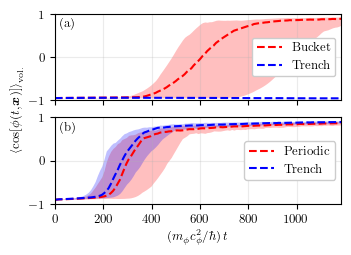

In [6]:
fig = plt.figure()
gs = fig.add_gridspec(2, 1, hspace=0.2)
axs = gs.subplots(sharex=True)
fig.set_size_inches(1.091*3.39, 0.667*1.091*3.39)
plt.ylabel(r'$\ev{\cos[\phi(t,\vb*x)]}_\textrm{vol.}$', y=1.1)
bucket = np.load('data/fig5/bucket-high-density.npy')
trench = np.load('data/fig5/trench-high-density.npy')
squareFast = np.load('data/fig5/periodic-low-density.npy')
trenchFast = np.load('data/fig5/trench-low-density.npy')
p = 0.0227501
t = np.linspace(0., 800., 129) * 1.4812110107194778
axs[0].grid(alpha=0.25)
low = np.quantile(bucket, p, axis=0)
mid = np.quantile(bucket, 0.50, axis=0)
high = np.quantile(bucket, 1.-p, axis=0)
axs[0].plot(t, mid, 'r--', label=r'$\textrm{Bucket}$')
axs[0].fill_between(t, low, high, color='r', ec='r', lw=0., alpha=0.25)
low = np.quantile(trench, p, axis=0)
mid = np.quantile(trench, 0.50, axis=0)
high = np.quantile(trench, 1.-p, axis=0)
axs[0].plot(t, mid, 'b--', label=r'$\textrm{Trench}$')
axs[0].fill_between(t, low, high, color='b', ec='b', lw=0., alpha=0.25)
axs[0].set_xlim(0., t[-1])
axs[0].set_ylim(-1., 1.)
axs[0].legend(loc=7, framealpha=1.)
axs[0].text(20., 0.92, r'$\mathrm{(a)}$',
            ha='left', va='top', bbox=dict(fc='w', ec='w', pad=0.5))
axs[1].grid(alpha=0.25)
low = np.quantile(squareFast, p, axis=0)
high = np.quantile(squareFast, 1.-p, axis=0)
axs[1].fill_between(t, low, high, color='r', ec='r', lw=0., alpha=0.25)
low = np.quantile(trenchFast, p, axis=0)
high = np.quantile(trenchFast, 1.-p, axis=0)
axs[1].fill_between(t, low, high, color='b', ec='b', lw=0., alpha=0.25)
mid = np.quantile(squareFast, 0.50, axis=0)
axs[1].plot(t, mid, 'r--', label=r'$\textrm{Periodic}$')
mid = np.quantile(trenchFast, 0.50, axis=0)
axs[1].plot(t, mid, 'b--', label=r'$\textrm{Trench}$')
axs[1].set_xlim(0., t[-1])
axs[1].set_ylim(-1., 1.)
axs[1].set_xlabel(r'$(m_\phi^{}c_\phi^2/\hbar)\,t$')
axs[1].legend(loc=7, framealpha=1.)
axs[1].text(20., 0.92, r'$\mathrm{(b)}$',
            ha='left', va='top', bbox=dict(fc='w', ec='w', pad=0.5))

# Figure 6

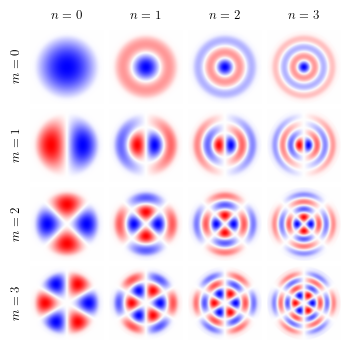

In [7]:
fig = plt.figure()
fig.set_size_inches(4.03, 4.03, forward=True)
nr, nc = 4, 4
axs = ImageGrid(fig, 111, nrows_ncols=(nr, nc), axes_pad=0.05, share_all=True)
ms = np.array([[m]*nc for m in range(nr)]).flatten()
ns = np.array(list(range(nc))*nr)
x = np.sqrt(2.) * np.pi / 1024. * np.array([j - 511.5 for j in range(1024)])
rGrid = np.sqrt(np.outer(np.ones(1024), x)**2. + np.outer(x, np.ones(1024))**2.)
tGrid = np.arctan2(np.outer(x, np.ones(1024)), np.outer(np.ones(1024), x))
data = np.load('data/fig6/bogoliubov.npy')
for i, ax in enumerate(axs):
    u = data[ms[i], ns[i]]
    if ms[i] % 2:
        spec = fft.dst(u, type=2)
        spec[-1] /= 2.
        uGrid = np.sum([spec[j] * np.sin((j+1)*rGrid) for j in range(512)], axis=0)
    else:
        spec = fft.dct(u, type=2)
        spec[0] /= 2.
        uGrid = np.sum([spec[j] * np.cos(j*rGrid) for j in range(512)], axis=0)
    uGrid /= np.max(np.abs(uGrid))
    if (np.max(-uGrid) < np.max(uGrid)):
        uGrid *= -1.
    uGrid *= np.cos(ms[i] * tGrid)
    ax.imshow(uGrid, cmap='bwr', interpolation='bicubic', vmin=-1., vmax=1.)
    ax.set_axis_off()
    trim = 185.
    ax.set_xlim(trim, 1024.-trim)
    ax.set_ylim(trim, 1024.-trim)
for i in range(nc):
    axs[i].text(512., 1024.-trim+80., r'$n='+str(i)+r'$', ha='center', va='bottom',
                fontsize='medium')
for i in range(nr):
    axs[i*nc].text(trim-80., 512., r'$m='+str(i)+r'$', ha='right', va='center',
                   rotation='vertical', fontsize='medium')

# Figure 7

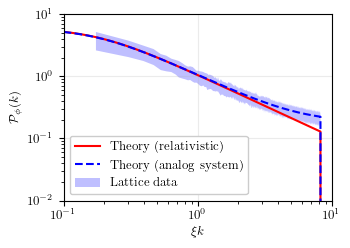

In [8]:
fig = plt.figure()
fig.set_size_inches(3.46, 0.7 * 3.46, forward=True)
plt.grid(alpha=0.25)
kCut = 512. * np.pi / 800.
c2tot = 0.05945153260505122
massSq = 0.018018255531671194
lam = 1.1
phi0 = 1.6533029912308832
ks = np.logspace(np.log10(0.1 * np.sqrt(c2tot)),
                 np.log10(20. * np.sqrt(c2tot)), 5001)
hw = np.sqrt(2. * ks**2. + massSq * (lam**2.-1.))
plt.loglog(ks / np.sqrt(c2tot), np.heaviside(kCut-ks,0.5)/ hw / phi0**2.,
           'r', label=r'$\textrm{Theory (relativistic)}$')
hw = (np.sqrt(ks**2. + 0.5 * massSq * (lam**2. - 1.))
      * np.sqrt(2. + ks**2. - 0.5 * massSq * (lam**2. + 1.)))
u = np.sqrt(0.5 * ((ks**2. + 1. - 0.5 * massSq) / hw + 1.))
v = np.sqrt(0.5 * ((ks**2. + 1. - 0.5 * massSq) / hw - 1.))
plt.loglog(ks / np.sqrt(c2tot), 0.5 * np.heaviside(kCut-ks,0.5) * (u+v)**2. / phi0**2.,
           'b--', label=r'$\textrm{Theory (analog system)}$')
data = np.load('data/fig7/spectra.npy')
freq = data[:, 0]
freq /= np.sqrt(c2tot)
mu = np.average(data[:, 1:], axis=1)
sig = np.std(data[:, 1:], axis=1)
plt.fill_between(freq, mu+sig, mu-sig, color='b', ec=None, alpha=0.25,
                 label=r'$\textrm{Lattice data}$')
plt.xlim(1.e-1, 1.e+1)
plt.ylim(1.e-2, 1.e+1)
plt.xlabel(r'$\xi k$')
plt.ylabel(r'$\mathcal{P}_\phi(k)$')
plt.legend(loc=0, framealpha=1.)